In [0]:
import nltk as nl
import os
import nltk.corpus
from gensim.summarization import summarize
from gensim.summarization import keywords
from helper import *
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim


In [104]:
#pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9ea09c3d5f58b6e5f3ff0e311caae9a3bc1aa07b4d28a8df94f2a4246afa0113
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:

#nltk.download('all')

In [14]:
path = nltk.data.find('corpora')
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [22]:
from google.colab import files
uploaded = files.upload()



Saving 1.txt to 1 (1).txt
Saving 2.txt to 2.txt
Saving 3.txt to 3.txt
Saving 4.txt to 4.txt
Saving 5.txt to 5.txt
Saving 6.txt to 6.txt
Saving 7.txt to 7.txt
Saving 8.txt to 8.txt
Saving 9.txt to 9.txt
Saving 11.txt to 11.txt
Saving 12.txt to 12.txt
Saving 13.txt to 13.txt
Saving 14.txt to 14.txt
Saving 16.txt to 16.txt
Saving 17.txt to 17.txt
Saving 18.txt to 18.txt
Saving 19.txt to 19.txt
Saving 20.txt to 20.txt
Saving 21.txt to 21.txt
Saving 22.txt to 22.txt
Saving 23.txt to 23.txt
Saving 24.txt to 24.txt
Saving 25.txt to 25.txt
Saving 26.txt to 26.txt
Saving 27.txt to 27.txt
Saving 28.txt to 28.txt
Saving 29.txt to 29.txt
Saving 30.txt to 30.txt
Saving 31.txt to 31.txt
Saving 32.txt to 32.txt
Saving 33.txt to 33.txt
Saving 34.txt to 34.txt
Saving 35.txt to 35.txt
Saving 36.txt to 36.txt
Saving 37.txt to 37.txt
Saving 38.txt to 38.txt
Saving 39.txt to 39.txt
Saving 40.txt to 40.txt
Saving 41.txt to 41.txt
Saving 42.txt to 42.txt
Saving 43.txt to 43.txt
Saving 44.txt to 44.txt
Saving

In [23]:
#memasukkan data
online_news = open('59.txt','r', encoding='unicode_escape')
print(online_news.read())

Laporan Farouk Kedaluarsa
by Redaksi LombokPost23 Mei 2019	

MATARAM-Caleg DPD RI Dapil NTB Prof H Farouk Muhammad melaporkan dua rival politiknya. Evi Apita Maya dan HL Suhaimi Ismy. Farouk menuduh keduanya menyerakan foto yang tidak sesuai ketentuan dalam PKPU RI no 21 tahun 2018.

Dalam aturan itu, syarat administrasi calon harus menyerahkan foto terbaru yang diambil maksimal enam bulan terakhir.

Laporannya ternyata kedaluarsa, kata Itratip, Komisioner Bawaslu NTB.

Saat pihak Farouk menyerahkan laporan, waktunya dinyatakan sudah melewati tujuh hari. Sejak berkas administrasi para calon DPD RI diserahkan pada KPU. Dalam peraturan Bawaslu no 7 tahun 2018, diatur dugaan pelanggaran administrasi paling lambat dilaporkan tujuh hari setelah berkas diserahkan.

Setelah itu bila tidak ada laporan atau temuan oleh Bawaslu, maka dianggap sesuai ketentuan.

Tapi ini kan dilaporkan (bahkan) setelah mendekati rekapitulasi hasil, ujarnya.

Dengan demikian, laporan tidak bisa ditindaklanjuti

In [28]:
online_news = open('59.txt','r', encoding='unicode_escape')

for word in online_news:
  print(word, sep=' ', end=' ')

Laporan Farouk Kedaluarsa
 by Redaksi LombokPost23 Mei 2019	
 
 MATARAM-Caleg DPD RI Dapil NTB Prof H Farouk Muhammad melaporkan dua rival politiknya. Evi Apita Maya dan HL Suhaimi Ismy. Farouk menuduh keduanya menyerakan foto yang tidak sesuai ketentuan dalam PKPU RI no 21 tahun 2018.
 
 Dalam aturan itu, syarat administrasi calon harus menyerahkan foto terbaru yang diambil maksimal enam bulan terakhir.
 
 Laporannya ternyata kedaluarsa, kata Itratip, Komisioner Bawaslu NTB.
 
 Saat pihak Farouk menyerahkan laporan, waktunya dinyatakan sudah melewati tujuh hari. Sejak berkas administrasi para calon DPD RI diserahkan pada KPU. Dalam peraturan Bawaslu no 7 tahun 2018, diatur dugaan pelanggaran administrasi paling lambat dilaporkan tujuh hari setelah berkas diserahkan.
 
 Setelah itu bila tidak ada laporan atau temuan oleh Bawaslu, maka dianggap sesuai ketentuan.
 
 Tapi ini kan dilaporkan (bahkan) setelah mendekati rekapitulasi hasil, ujarnya.
 
 Dengan demikian, laporan tidak bisa 

In [0]:
online_news = open('59.txt','r', encoding='unicode_escape')
text = ' '.join(online_news)

def get_summary(text, pct):
  summary = summarize(text, ratio=pct, split=True)
  return summary

In [45]:
print(get_summary(text, 0.3))

['Farouk menuduh keduanya menyerakan foto yang tidak sesuai ketentuan dalam PKPU RI no 21 tahun 2018.', 'Dalam aturan itu, syarat administrasi calon harus menyerahkan foto terbaru yang diambil maksimal enam bulan terakhir.', 'Dalam peraturan Bawaslu no 7 tahun 2018, diatur dugaan pelanggaran administrasi paling lambat dilaporkan tujuh hari setelah berkas diserahkan.', 'Setelah itu bila tidak ada laporan atau temuan oleh Bawaslu, maka dianggap sesuai ketentuan.', 'Dengan demikian, laporan tidak bisa ditindaklanjuti oleh Bawaslu NTB.', 'Karena ketentuan yang telah membatasi waktu pelaporan, setiap dugaan pelanggaran administrasi pemilu.', 'Terkait status laporan Farouk yang kedaluarsa, Itra mengatakan nantinya akan ada pengumuman melalui media-media Bawaslu mana saja laporan yang telah ditindaklanjuti dan kedalurasa.', '\x93Nanti mungkin kita akan sampaikan juga pada timnya, sekalipun tidak ada keharusan,\x94 kata Itra.', 'Sebelumnya Bawaslu NTB telah menemukan ada tiga PNS dan satu pera

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def get_keyword(text):
  
  res = keywords(text,
                 ratio = 0.1,
                 words=None,
                 split=False,
                 scores=False,
                 pos_filter=('NN','JJ'),
                 lemmatize= False,
                 deacc=False)
  
  res = res.split('\n')
  return res

In [63]:
print(get_keyword(text))

['foto yang tidak', 'telah', 'farouk', 'laporan', 'dan', 'itu', 'atau', 'ada', 'pada', 'ntb', 'administrasi calon', 'dalam', 'kata', 'bawaslu', 'juga', 'saat', 'setelah', 'terkait', 'dengan']


In [66]:
import re
import string
New_text = re.sub('[^a-zA-Z-9]', ' ', text)
print(New_text)

Laporan Farouk Kedaluarsa  by Redaksi LombokPost   Mei    9     MATARAM-Caleg DPD RI Dapil NTB Prof H Farouk Muhammad melaporkan dua rival politiknya  Evi Apita Maya dan HL Suhaimi Ismy  Farouk menuduh keduanya menyerakan foto yang tidak sesuai ketentuan dalam PKPU RI no    tahun          Dalam aturan itu  syarat administrasi calon harus menyerahkan foto terbaru yang diambil maksimal enam bulan terakhir      Laporannya ternyata kedaluarsa   kata Itratip  Komisioner Bawaslu NTB     Saat pihak Farouk menyerahkan laporan  waktunya dinyatakan sudah melewati tujuh hari  Sejak berkas administrasi para calon DPD RI diserahkan pada KPU  Dalam peraturan Bawaslu no   tahun       diatur dugaan pelanggaran administrasi paling lambat dilaporkan tujuh hari setelah berkas diserahkan     Setelah itu bila tidak ada laporan atau temuan oleh Bawaslu  maka dianggap sesuai ketentuan      Tapi ini kan dilaporkan  bahkan  setelah mendekati rekapitulasi hasil   ujarnya     Dengan demikian  laporan tidak bisa 

In [0]:
stop_word = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(New_text))
filter_sentece = [w for w in word_tokens if not w in stop_word]
normalize = ' '.join(lemma.lemmatize(word) for word in filter_sentece)

In [79]:
from nltk import ngrams
n=2
total_gram = []
number_of_grams = ngrams(normalize.split(), n)
for grams in number_of_grams:
  total_gram.append(grams)
  
print(total_gram[:10])

[('Laporan', 'Farouk'), ('Farouk', 'Kedaluarsa'), ('Kedaluarsa', 'Redaksi'), ('Redaksi', 'LombokPost'), ('LombokPost', 'Mei'), ('Mei', '9'), ('9', 'MATARAM-Caleg'), ('MATARAM-Caleg', 'DPD'), ('DPD', 'RI'), ('RI', 'Dapil')]


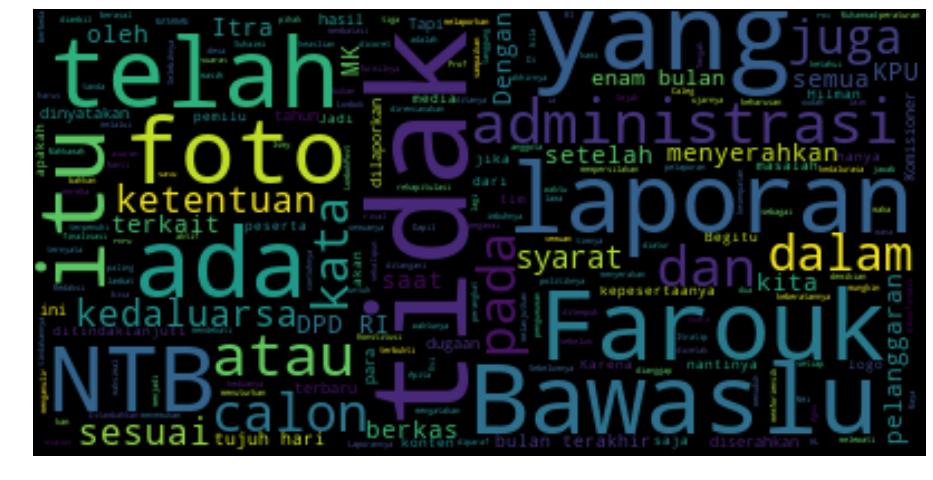

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=60).generate(normalize)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
count={}
for w in normalize.split():
  if w in count:
    count[w] += 1
  else:
    count[w] = 1

for word, times in count.items():
  if times > 6:
    print("%s Telah ditemukan %s Kali" % (word, times))


Farouk Telah ditemukan 7 Kali
yang Telah ditemukan 9 Kali
tidak Telah ditemukan 14 Kali
Bawaslu Telah ditemukan 7 Kali
ada Telah ditemukan 7 Kali
telah Telah ditemukan 7 Kali


In [0]:
def sen_to_word(sentence):
  for sentence in sentence:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [94]:
import gensim
from gensim import corpora
tokenized_sent = list(sen_to_word(filter_sentece))
dictionary = corpora.Dictionary(tokenized_sent)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sent]
print(doc_term_matrix)

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [], [(6, 1), (7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [], [(1, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(1, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(9, 1)], [(35, 1)], [(33, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(28, 1)], [(43, 1)], [(29, 1)], [(44, 1)], [(45, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(50, 1)], [(2, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(11, 1)], [(55, 1)], [(56, 1)], [(1, 1)], [(42, 1)], [(0, 1)], [(57, 1)], [(58, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(63, 1)], [(64, 1)], [(39, 1)], [(65, 1)], [(40, 1)], [(8, 1)], [(9, 1)], [(66, 1)], [(67, 1)], [(68, 1)], [(33, 1)], [(69, 1)], [(54, 1)], [(35, 1)], [(70, 1)], [(71, 1)], [(72, 1)], [(39, 1)],

In [99]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word=dictionary, passes=100)
print(ldamodel.print_topics(num_topics=10, num_words= 20))

[(0, '0.061*"bawaslu" + 0.053*"itu" + 0.027*"dengan" + 0.027*"ketentuan" + 0.027*"mk" + 0.019*"media" + 0.019*"dari" + 0.019*"hasil" + 0.019*"saja" + 0.019*"ini" + 0.019*"tapi" + 0.019*"masalah" + 0.019*"dilaporkan" + 0.019*"para" + 0.010*"ternyata" + 0.010*"tanggung" + 0.010*"pihak" + 0.010*"nanti" + 0.010*"status" + 0.010*"menjadi"'), (1, '0.074*"yang" + 0.050*"ntb" + 0.042*"calon" + 0.042*"dan" + 0.034*"dalam" + 0.026*"terkait" + 0.026*"menyerahkan" + 0.026*"terakhir" + 0.026*"pelanggaran" + 0.018*"tim" + 0.018*"jadi" + 0.018*"apakah" + 0.010*"ditempuh" + 0.010*"maksimal" + 0.010*"konstitusi" + 0.010*"menuturkan" + 0.010*"pengumuman" + 0.010*"timnya" + 0.010*"finalisasi" + 0.010*"mana"'), (2, '0.056*"foto" + 0.029*"setelah" + 0.029*"hari" + 0.029*"semua" + 0.020*"dinyatakan" + 0.020*"pemilu" + 0.020*"hilman" + 0.020*"karena" + 0.020*"peserta" + 0.020*"diserahkan" + 0.020*"logo" + 0.020*"kepesertaanya" + 0.011*"mataram" + 0.011*"caleg" + 0.011*"sedangkan" + 0.011*"suara" + 0.011*"uja

In [106]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))
coherence_model_lda = CoherenceModel(
    model = ldamodel,
    texts = tokenized_sent,
    dictionary = dictionary,
    coherence = "c_v"
)
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence score : ", coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.614359998277554
Coherence score :  0.8420918471721335


In [114]:
pyLDAvis.enable_notebook()
visualisasi = pyLDAvis.gensim.prepare(
    ldamodel,
    doc_term_matrix,
    dictionary
)

visualisasi

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.227009 -0.010507       1        1  24.478853
1     -0.073849 -0.174759       2        1  19.479816
3     -0.062635  0.115106       3        1  19.479689
0     -0.050949  0.046977       4        1  18.707571
2     -0.039575  0.023183       5        1  17.854069, topic_info=    Category      Freq          Term     Total  loglift  logprob
30   Default  9.000000         tidak  9.000000  30.0000  30.0000
29   Default  6.000000          yang  6.000000  29.0000  29.0000
54   Default  5.000000       bawaslu  5.000000  28.0000  28.0000
28   Default  4.000000          foto  4.000000  27.0000  27.0000
37   Default  4.000000           itu  4.000000  26.0000  26.0000
11   Default  4.000000           ntb  4.000000  25.0000  25.0000
0    Default  4.000000       laporan  4.000000  24.0000  24.0000
1    Default  4.000000        farouk  4.000000  23.0000  23.0000
78   Default  4.000000           ada  4.000000  22.0000  22.0000
97   Default  4.000000         telah  4.000000  21.0000  21.0000
67   Default  3.000000          pada  3.000000  20.0000  20.0000
40   Default  3.000000         calon  3.000000  19.0000  19.0000
21   Default  3.000000           dan  3.000000  18.0000  18.0000
39   Default  4.000000  administrasi  4.000000  17.0000  17.0000
79   Default  4.000000          atau  4.000000  16.0000  16.0000
134  Default  3.000000          juga  3.000000  15.0000  15.0000
9    Default  3.000000            ri  3.000000  14.0000  14.0000
51   Default  3.000000          kata  3.000000  13.0000  13.0000
33   Default  3.000000         dalam  3.000000  12.0000  12.0000
76   Default  2.000000       setelah  2.000000  11.0000  11.0000
62   Default  2.000000          hari  2.000000  10.0000  10.0000
139  Default  2.000000         semua  2.000000   9.0000   9.0000
92   Default  2.000000        dengan  2.000000   8.0000   8.0000
114  Default  2.000000            mk  2.000000   7.0000   7.0000
32   Default  2.000000     ketentuan  2.000000   6.0000   6.0000
68   Default  2.000000           kpu  2.000000   5.0000   5.0000
8    Default  2.000000           dpd  2.000000   4.0000   4.0000
61   Default  2.000000         tujuh  2.000000   3.0000   3.0000
55   Default  2.000000          saat  2.000000   2.0000   2.0000
38   Default  2.000000        syarat  2.000000   1.0000   1.0000
..       ...       ...           ...       ...      ...      ...
6     Topic5  0.794163         caleg  1.302257   1.2284  -4.5237
7     Topic5  0.794163       mataram  1.302257   1.2284  -4.5237
17    Topic5  0.794106    politiknya  1.302255   1.2283  -4.5238
196   Topic5  0.794106        tangan  1.302255   1.2283  -4.5238
180   Topic5  0.794106         suara  1.302255   1.2283  -4.5238
16    Topic5  0.794106         rival  1.302255   1.2283  -4.5238
201   Topic5  0.794106   sekretariat  1.302255   1.2283  -4.5238
138   Topic5  0.794106   ditambahkan  1.302255   1.2283  -4.5238
13    Topic5  0.794106      muhammad  1.302255   1.2283  -4.5238
27    Topic5  0.794106    menyerakan  1.302255   1.2283  -4.5238
140   Topic5  0.794106     ditangani  1.302255   1.2283  -4.5238
199   Topic5  0.794106     sedangkan  1.302255   1.2283  -4.5238
91    Topic5  0.794106       ujarnya  1.302255   1.2283  -4.5238
10    Topic5  0.794106         dapil  1.302255   1.2283  -4.5238
222   Topic5  0.794106    fasilitasi  1.302255   1.2283  -4.5238
70    Topic5  0.794106        diatur  1.302255   1.2283  -4.5238
155   Topic5  0.794106       sebagai  1.302255   1.2283  -4.5238
226   Topic5  0.794106     persoalan  1.302255   1.2283  -4.5238
57    Topic5  0.794106      waktunya  1.302255   1.2283  -4.5238
87    Topic5  0.794106        bahkan  1.302255   1.2283  -4.5238
133   Topic5  0.794106     sampaikan  1.302255   1.2283  -4.5238
189   Topic5  0.794106    selebihnya  1.302255   1.2283  -4.5238
137   Topic5  0.794106     keharusan  1.302255   1.2283  -4.5238
166 